
# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### This Dataset is about a patient who makes a doctor appointment, receives all the instructions and no-show... We need to disover any factors that make us understand why they didn't show , What factors are important for us to know in order  to predict if a patient will show up for their scheduled appointment?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Reading the Dataset and viewing first 5 Rows...
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df1=df
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#How many Rows and Columns there....
df.shape

(110527, 14)

In [4]:
# Exploring data types and Null values.....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Confirming all object types are just Strings....
type(df["Gender"][1]),type(df["ScheduledDay"][1]),type(df["AppointmentDay"][1]),type(df["Neighbourhood"][1]),type(df["No-show"][1])

(str, str, str, str, str)

In [6]:
#Confirming the absence of Null values......
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#Checking any duplicated rows.....
df.duplicated().sum()

0

In [8]:
#fast view on data statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning 
### (Droping unwanted columns, Add others if needed )

In [9]:
#Droping ID columns ...... Not needed 
df.drop(columns=["PatientId","AppointmentID"], inplace=True)

In [10]:
#Time in the first columns isn't needed, also time at second is the same (00:00) so better remove
df["ScheduledDay"] = df["ScheduledDay"].apply(lambda x: x.split("T")[0])
df["AppointmentDay"] = df["AppointmentDay"].apply(lambda x: x.split("T")[0])
df.head()
#Confirming the changes

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### We got no Null values and no Duplicated rows .... we can move on to the next step ....

<a id='eda'></a>
## Exploratory Data Analysis

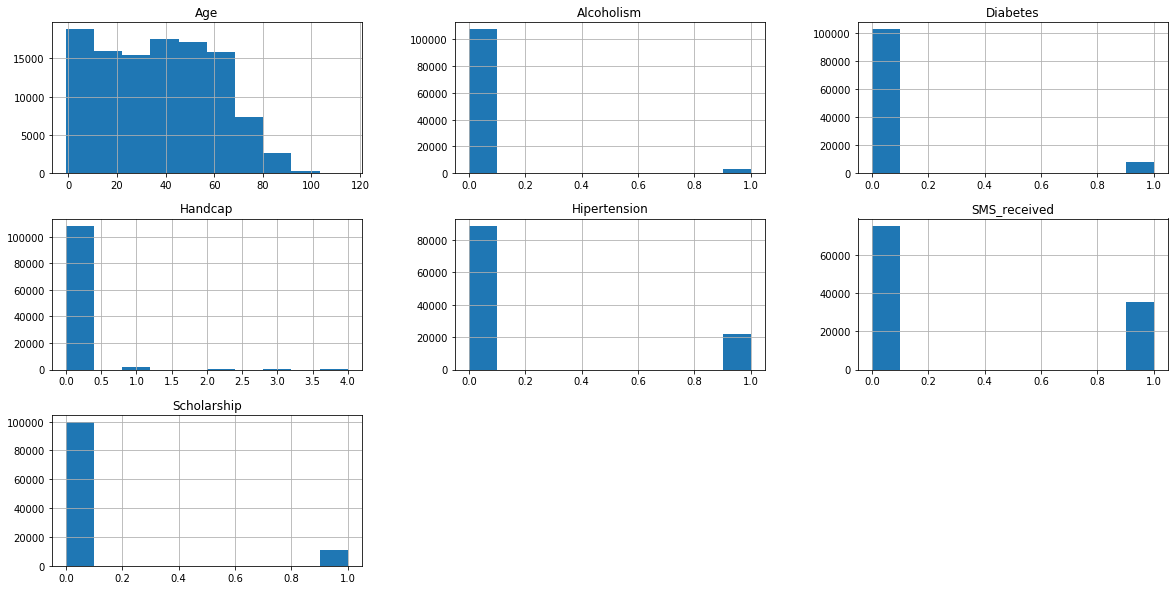

In [11]:
#First just a geneal look on data dist.
df.hist(figsize=(20,10));

#### Age Dist. shows most patient are too young (Enfants) or atleast 37 of age or older.
#### Handcap , Alcoholism, Scholarship very biased data and followed by Diabetes >>>>> Not wise at all but still will look for any relation for showing or not  also will see if SMS_received has any effect on Showing

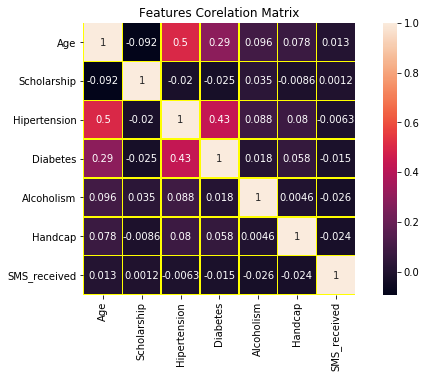

In [12]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(df.corr(),annot=True,linewidths=0.5,annot_kws={"size": 10},linecolor="yellow",square=True,);
bottom , top = ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5)
plt.title("Features Corelation Matrix");

#### Most Features have poor correlation among each others, only Hipertension and Age Might have a relation and that would be normal as older people  is likely to have Hipertension than younger people, Also Many patients who got Diabetes may also have Hipertension and older people have higher opportunity to have Diabetes and that would be normal too.

### If the Appointment is the Same as Scheduled Day affects the patient's decision to show up ? 

In [13]:
#Let's see how many patient got his appointment on the same day ....
df[df["ScheduledDay"]==df["AppointmentDay"]].shape

(38563, 12)

In [14]:
#Let's see the Percentage
print ("Percentage = "+ str((38563/110527)*100) + " %")
#Well .... about 35% is good to use >>>> let's see if it affects showing up.....

Percentage = 34.890117346892616 %


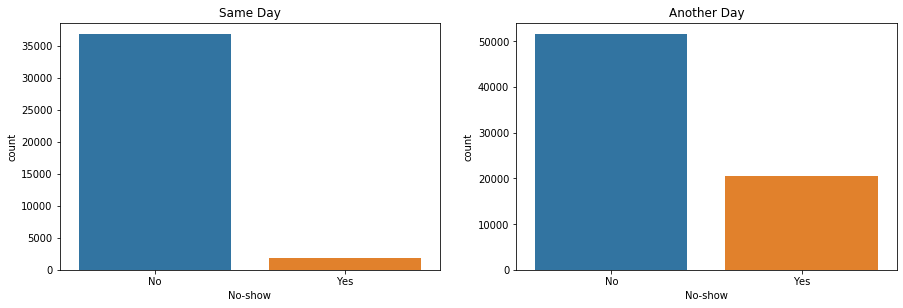

In [15]:
#Comparing the effect of having appointment on the same day.....
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
plt.title("Same Day")
sns.countplot(x=df[df["ScheduledDay"]==df["AppointmentDay"]]["No-show"]);
ax = fig.add_subplot(222)
plt.title("Another Day")
sns.countplot(x=df[df["ScheduledDay"]!=df["AppointmentDay"]]["No-show"]);

### As shown if the patient got his appointment on the same day it's very likely he will show up. 
#### Now let's ask another question ..

### Does SMS Receiving affects patient's show ?

In [16]:
#SMS received Values
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

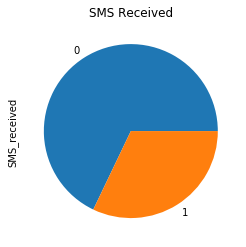

In [17]:
df["SMS_received"].value_counts().plot(kind="pie");
plt.title("SMS Received");
#Ratio nearly 2:1

#### Most people don't receive SMSs, Ratio of who didn't receive to who received is nearly 2:1

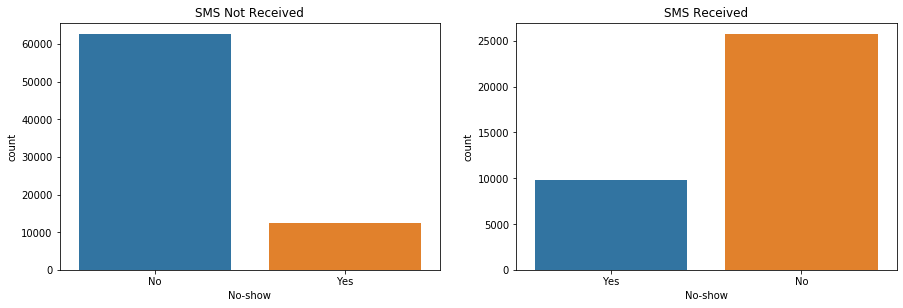

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
plt.title("SMS Not Received")
sns.countplot(x=df[df["SMS_received"]==0]["No-show"]);
ax = fig.add_subplot(222)
plt.title("SMS Received")
sns.countplot(x=df[df["SMS_received"]==1]["No-show"]);


### As shown if patient didn't receive a SMS he is more likely to  show than receiving one

### Does Age has any effect on showing ?

In [19]:
df["Age"].describe()
#General view on Age statistics ..... 
# I'll consider the Min -1 is for Fetus , 0 for just less than 12 Months old

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

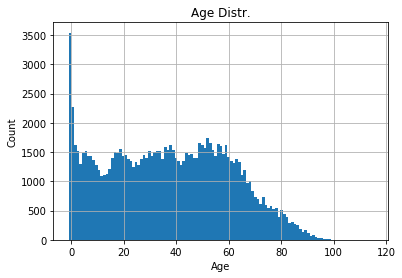

In [20]:
#115 bin as Max =115
plt.title("Age Distr.")
plt.xlabel("Age")
plt.ylabel("Count")
df["Age"].hist(bins=115);
#Right Skewed

### Most Patient who are less than 15 are Infants, Most patient population are between 18 and 60, From 60 and older patients numbers decrease .... That's normal as in real life people older than 60 are at thier late years.

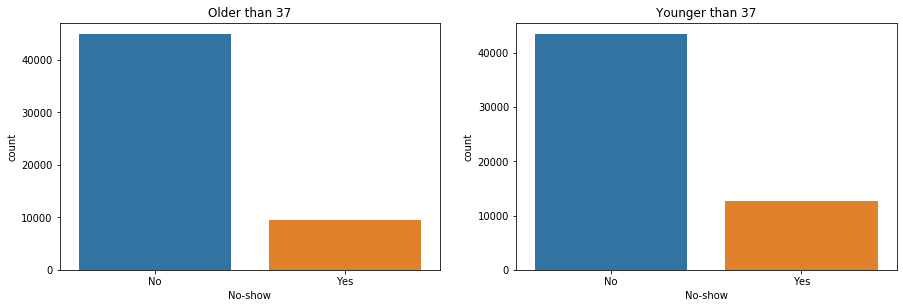

In [21]:
#let's divide to 2 sets .... Above mean and lower than mean then see any notice
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
plt.title("Older than 37")
sns.countplot(x=df[df["Age"]> df["Age"].mean()]["No-show"]);
ax = fig.add_subplot(222)
plt.title("Younger than 37")
sns.countplot(x=df[df["Age"]< df["Age"].mean()]["No-show"]);

### small difference but belongs to reality ... older people tends to show up for their appointment

### Does Gender has any relation with Showing ?

In [22]:
#General view on gender
df["Gender"].value_counts()
#Well .... Most patients are females ..... Surely not because they have more illnes ratio than males but they just 
#prefer to stay healthy and for that they live longer  :D

F    71840
M    38687
Name: Gender, dtype: int64

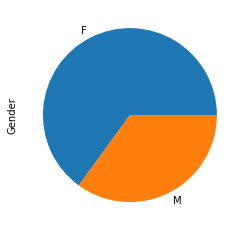

In [23]:
df["Gender"].value_counts().plot(kind="pie");
#Nearly 2:1 

#### Most patients are females, the ratio of females to males is nearly 2:1

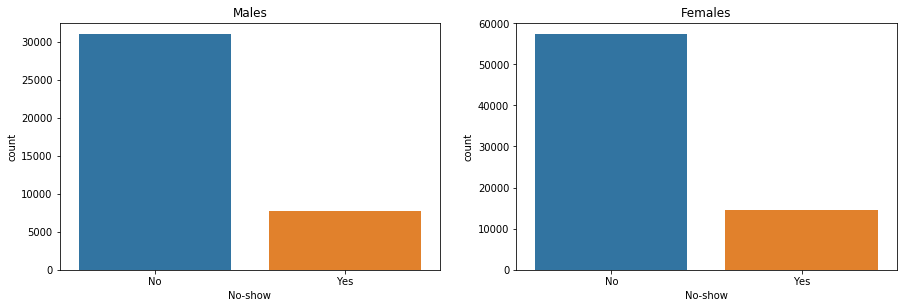

In [24]:
#Let's see if any relation between Gender and Showing up
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
plt.title("Males")
sns.countplot(x=df[df["Gender"]=="M"]["No-show"]);
ax = fig.add_subplot(222)
plt.title("Females")
sns.countplot(x=df[df["Gender"]=="F"]["No-show"]);

### No Difference at all ........ from this data we can't predict upon Gender

### Does having a Scholarship affects Showing ?

In [25]:
df["Scholarship"].value_counts()
#Nearly 10:1 ..... Very Biased

0    99666
1    10861
Name: Scholarship, dtype: int64

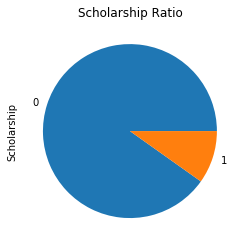

In [26]:
plt.title("Scholarship Ratio")
df["Scholarship"].value_counts().plot(kind="pie");

#### Most patients don't have Scholarships ...... this one is vey biased as nearly ratio of who have Shcolarship to who haven't is nearly 10:1

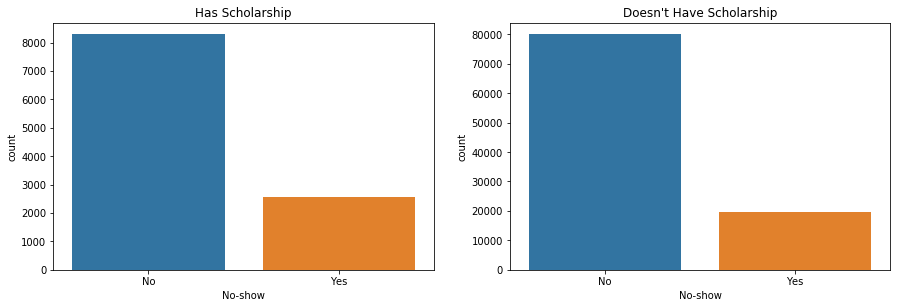

In [27]:
# Let's see if it affects showing .... even it's very biased
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
plt.title("Has Scholarship")
sns.countplot(x=df[df["Scholarship"]==1]["No-show"]);
ax = fig.add_subplot(222)
plt.title("Doesn't Have Scholarship")
sns.countplot(x=df[df["Scholarship"]==0]["No-show"]);

### People with Scholarship tend to miss their appointment  more than the rest 

### Does having Hipertension affects Showing ?

In [28]:
df["Hipertension"].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

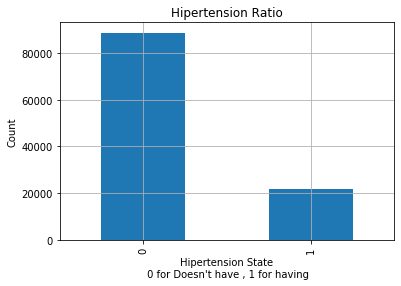

In [34]:
#Ratio nearly 4:1
plt.title("Hipertension Ratio")
plt.xlabel("Hipertension State" + "\n" +" 0 for Doesn't have , 1 for having")
plt.ylabel("Count")
df["Hipertension"].value_counts().plot(kind="bar");
plt.grid(True)

#### As shown most people don't have Hipertension ..... ratio of who haven't to who have is nearly 4:1

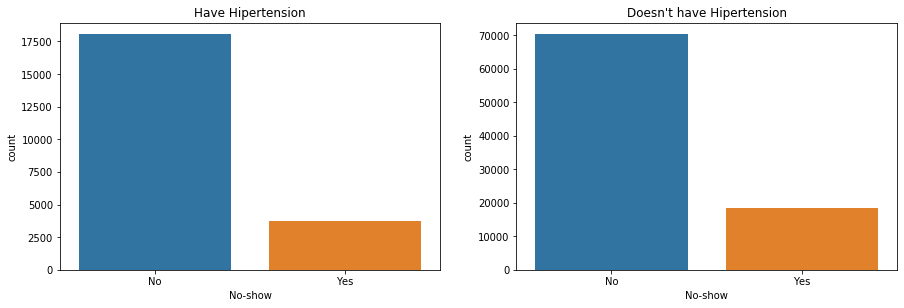

In [30]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
plt.title("Have Hipertension")
sns.countplot(x=df[df["Hipertension"]==1]["No-show"]);
ax = fig.add_subplot(222)
plt.title("Doesn't have Hipertension")
sns.countplot(x=df[df["Hipertension"]==0]["No-show"]);

### People with Hipertension tends to show more than Others

## Conclusions

### Results : Our data suggests that
  


#### (1) Patients are very likely to show if got their Appointment on same day they scheduled.
#### (2) Patients are more likely to show if they didn't recieve SMS messages.
#### (3) Patients are more likely to show if they are older than 37.
#### (4) Patients are more likely to show if they don't have a Scholarship by a small ratio.
#### (5) Patients are more likely to show if they have Hipertension by a ver small ratio.
#### (6) According to this dataset Gender has no effect on showing or not.

### Limitations :

#### (1) Most of our data is categorical, it makes it hard to show strong correlations between factors.
#### (2) I found the result that showing for the appointment is more likely to happen if patient don't receive SMS is strange, perhaps more details are a needed to clarify that.
#### (3) Most of our features are very biased, pehaps having less biased data would be better.